In [1]:
import sys
!{sys.executable} -m pip install numpy matplotlib scikit-learn scipy seaborn nltk

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
data = pd.read_csv("abcnews-date-text.csv")

data = data['headline_text'].drop_duplicates()


print(len(data))

1213004


In [74]:

# Punctiation to separate words for vecotrization
punctuation = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
# Words that are uninformative like 'and' 'or' 'but' 
stop_words = text.ENGLISH_STOP_WORDS.union(punctuation)


vectorizer = TfidfVectorizer(stop_words = stop_words)

X = vectorizer.fit_transform(data)


# Use predefined stemmers and tokenizers
stem = SnowballStemmer('english')
token = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    # Returns the array of stemmed words from the tokenized tevxt
    return [stem.stem(word) for word in token.tokenize(text.lower())]

vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)

X = vectorizer3.fit_transform(data)


AttributeError: ignored

In [39]:
words = vectorizer3.get_feature_names()
print(words)

['abbott', 'abc', 'aborigin', 'abus', 'access', 'accid', 'accus', 'act', 'action', 'ad', 'address', 'adelaid', 'admit', 'affect', 'afghan', 'afghanistan', 'afl', 'africa', 'age', 'agre', 'agreement', 'ahead', 'aid', 'aim', 'air', 'airport', 'al', 'alcohol', 'alert', 'alic', 'alleg', 'allow', 'alp', 'amid', 'andrew', 'anger', 'anim', 'announc', 'anoth', 'anti', 'anzac', 'apologis', 'appeal', 'appear', 'appoint', 'approv', 'area', 'arm', 'armi', 'arrest', 'arriv', 'art', 'ash', 'ask', 'assault', 'assist', 'asylum', 'attack', 'attempt', 'august', 'aussi', 'aust', 'australia', 'australian', 'author', 'avoid', 'await', 'award', 'away', 'axe', 'b', 'babi', 'bad', 'bail', 'bali', 'ban', 'bank', 'base', 'bash', 'battl', 'bay', 'beach', 'beat', 'becom', 'beef', 'befor', 'begin', 'bendigo', 'benefit', 'best', 'better', 'bid', 'big', 'biki', 'billion', 'bird', 'black', 'blame', 'blast', 'blaze', 'block', 'blow', 'blue', 'board', 'boat', 'bodi', 'bomb', 'bomber', 'book', 'boom', 'boost', 'border',

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init=4,max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(6, 11)

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-.1, 0.5])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters,n_init=4, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels=cluster_labels)
    
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    max_size_cluster = 0
    bigest_size_index = 0
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        if size_cluster_i > max_size_cluster:
            max_size_cluster = size_cluster_i
            bigest_size_index = i

        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



In [91]:
print(X.shape)

(1213004, 1000)


**K-Means TFIDF K=8**

In [41]:

kmeans = KMeans(n_clusters = 10, n_init = 20)
kmeans.fit(X)

# Finally, we look at 8 the clusters generated by k-means. Show the top 25 words in each cluster 
common_words = kmeans.cluster_centers_.argsort()[:,-1:-10:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : plan, win, australia, council, govt, report, kill, nsw, warn
1 : new, zealand, year, law, case, plan, open, record, council
2 : australian, open, year, share, dollar, south, market, win, new
3 : say, polic, need, minist, govt, expert, trump, plan, mp
4 : interview, extend, nrl, michael, afl, john, david, speak, mark
5 : health, hospit, boost, mental, fund, servic, plan, govt, minist
6 : help, fight, fund, urg, farmer, save, vow, govt, council
7 : flood, hit, resid, rain, damag, qld, nsw, warn, victim
8 : polic, investig, probe, man, offic, search, arrest, hunt, miss
9 : man, charg, court, murder, face, jail, accus, assault, stab


In [42]:
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 987397]
 [     1  32205]
 [     2  15966]
 [     3  28340]
 [     4   6682]
 [     5  27471]
 [     6  16373]
 [     7   8836]
 [     8  36256]
 [     9  53478]]


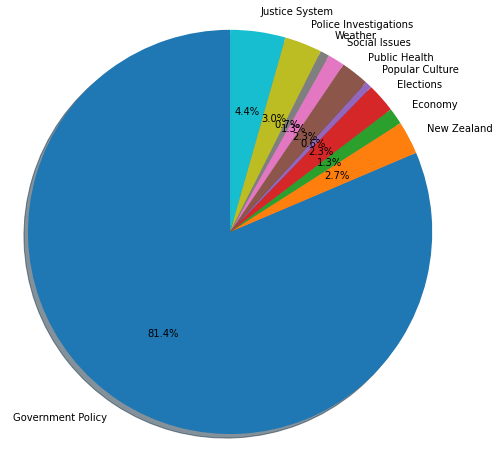

In [45]:
labels = ['Government Policy', 'New Zealand', 'Economy','Elections', 'Popular Culture', 'Public Health','Social Issues','Weather','Police Investigations','Justice System']

sizes = [987397, 32205, 15966, 28340,6682,27471,16373,8836,36256,53478]


fig1, ax1 = plt.subplots()
fig1.set_figheight(8)
fig1.set_figwidth(8)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**K-Means Word2Vec**

In [3]:
import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

nltk.download("stopwords")

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [59]:
data

0          aba decides against community broadcasting lic...
1             act fire witnesses must be aware of defamation
2             a g calls for infrastructure protection summit
3                   air nz staff in aust strike for pay rise
4              air nz strike to affect australian travellers
                                 ...                        
1244179    two aged care residents die as state records 2...
1244180    victoria records 5;919 new cases and seven deaths
1244181      wa delays adopting new close contact definition
1244182    western ringtail possums found badly dehydrate...
1244183    what makes you a close covid contact here are ...
Name: headline_text, Length: 1213004, dtype: object

In [75]:
# Use predefined stemmers and tokenizers
stem = SnowballStemmer('english')
token = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    # Returns the array of stemmed words from the tokenized tevxt
    return [stem.stem(word) for word in token.tokenize(text.lower())]

In [79]:
def clean_text(text, tokenizer, stopwords):
    """Pre-process text and generate tokens

    Args:
        text: Text to tokenize.

    Returns:
        Tokenized text.
    """
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    tokens = tokenizer(text)  # Get tokens from text
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens


In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [80]:
custom_stopwords = set(stopwords.words("english") + ["news", "new", "top"])

# Create text column based on title, description, and content

data = data.map(lambda x: clean_text(x, tokenize, custom_stopwords))




In [93]:
data

0                 [aba, decid, communiti, broadcast, licenc]
1                        [act, fire, wit, must, awar, defam]
2                     [call, infrastructur, protect, summit]
3                  [air, nz, staff, aust, strike, pay, rise]
4              [air, nz, strike, affect, australian, travel]
                                 ...                        
1244179          [two, age, care, resid, die, state, record]
1244180               [victoria, record, case, seven, death]
1244181          [wa, delay, adopt, close, contact, definit]
1244182    [western, ringtail, possum, found, bad, dehydr...
1244183                  [make, close, covid, contact, rule]
Name: headline_text, Length: 1213004, dtype: object

In [81]:
model = Word2Vec(sentences=data, size=300, workers=3, sg=1)



In [82]:
wv = model.wv


#get vocab from wv and then iterate through wv
ind2word = wv.index2word
vectorized_words = []
words = []
for i in ind2word:
  vectorized_words.append(wv[i])
  words.append(i)



In [83]:
print(len(words))

27122


In [ ]:
words

In [84]:
vectorized_words = np.array(vectorized_words)
kmeans = KMeans(n_clusters = 10, n_init = 20)
kmeans.fit(vectorized_words)

KMeans(n_clusters=10, n_init=20)

In [92]:
print(vectorized_words.shape)

(27122, 300)


In [90]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-25:-1]

for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', ',end='')
    centroid = centroid[15:25]
    for c in centroid:
      print(ind2word[c] + ' ',end='')
    print('')
    

0 : , vic three victim sydney say covid delay work teen 
1 : , job report council resid lead teen feder worker covid 
2 : , world report leav rescu probe job budget resid decis 
3 : , farm accus support melbourn china put die leader worker 
4 : , melbourn support mp report mayor north covid rain hour 
5 : , crash park run continu make covid victim nt resid 
6 : , defend leav south world say studi woman save covid 
7 : , reveal talk decis rescu go world first strike research 
8 : , put hour land continu close woman south play sydney 
9 : , close put decis land woman south student research region 


In [86]:
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0  1783]
 [    1  1413]
 [    2  2508]
 [    3  1314]
 [    4  1581]
 [    5  1922]
 [    6 10317]
 [    7  1214]
 [    8  2601]
 [    9  2469]]


Running K-Means with K=8 was able to yield pretty good results in terms of the ability to extract topics from the groups of words for TF-IDF. However, with the TF-IDF vectorizations one group out of the eight was significantly larger than the others classifying 80% of the data points.


Running K-Means with K=8 was not able to yield good results for extracting topics from groups of words for Word2Vec. Many of the same words appeared in multiple groups which indicates that K-Means was not able to effectively separate the data. One reason for this could be the curse of dimensionality as the vectors are encoded to a R300 vector space. To see if K-Means would work better in a higher dimensional space, we will run Word2Vec again with higher dimensional encodings...

In [ ]:
model = Word2Vec(sentences=data, size=1000, workers=3, sg=1)

In [ ]:
wv = model.wv


#get vocab from wv and then iterate through wv
ind2word = wv.index2word
vectorized_words = []
words = []
for i in ind2word:
  vectorized_words.append(wv[i])
  words.append(i)



In [ ]:
vectorized_words = np.array(vectorized_words)
kmeans = KMeans(n_clusters = 10, n_init = 20)
kmeans.fit(vectorized_words)

In [ ]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-25:-1]

for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', ',end='')
    centroid = centroid[:10]
    for c in centroid:
      print(ind2word[c] + ' ',end='')
    print('')
    